# DSP - Assignment 2

by Tymur Lysenko

Import the necessary libraries.

In [92]:
import numpy as np
from scipy.spatial import distance
from numpy import pi, sin
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from IPython.display import display, Audio

Implement the DFT function

In [93]:
def dft_matrix(x: np.ndarray) -> np.ndarray:
  """
  Performs Discrete Fourier Transform on the input signal and return the complex vector consisting of 2 components, real and imaginary part.

  :param x: input signal
  :return: Numpy array of shape (len(x), 2), where the inner array represents a complex number, where the first element is a real part of the number and the second is the imaginary.
  """
  num_samples = x.shape[0]

  Ns = np.tile(
    np.arange(0, num_samples, 1),
    (num_samples, 1)
  )

  Ks = Ns.T

  KNs = Ks * Ns

  As = np.cos(KNs * -(2 * np.pi / num_samples))
  Bs = np.sin(KNs * -(2 * np.pi / num_samples))

  return np.dstack([
    As.dot(x),
    Bs.dot(x),
  ])[0]


def dft(x: np.ndarray, print_progress: bool=False) -> np.ndarray:
  """
  Performs Discrete Fourier Transform on the input signal and return the complex vector consisting of 2 components, real and imaginary part.

  :param x: input signal
  :param print_progress: prints the progress of performing dft in terms of frequencies converted
  :return: Numpy array of shape (len(x), 2), where the inner array represents a complex number, where the first element is a real part of the number and the second is the imaginary.
  """
  num_samples = x.shape[0]
  result = np.zeros((num_samples, 2))

  iterator = (tqdm(np.arange(0, num_samples, 1))
              if print_progress else
              np.arange(0, num_samples, 1))

  for k in iterator:
    kns = np.arange(0, num_samples, 1) * k

    a = np.cos(kns * -(2 * np.pi / num_samples))
    b = np.sin(kns * -(2 * np.pi / num_samples))

    result[k] = np.array([a.dot(x), b.dot(x)])

  return result

Validate the function by generating `sin`, applying DTF to it and viewing the result.

In [94]:
def get_sin(sin_ampl: float, sin_freq: float, fs: float, num_samples: int = None) -> (np.ndarray, float):
  if num_samples is None:
    num_samples = fs

  step_size = (2 * pi * sin_freq) / fs
  samples = np.arange(0, num_samples) * step_size

  return sin_ampl * sin(samples), step_size

Text(0.5, 1.0, 'step size 0.001...')

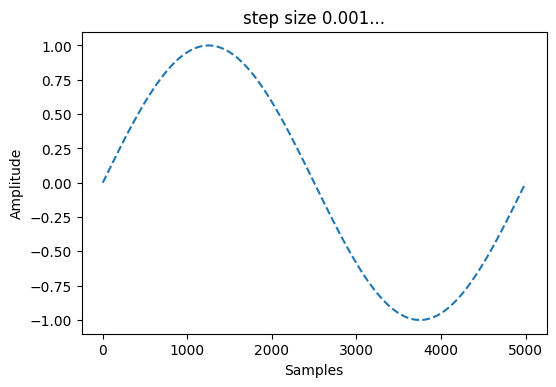

In [95]:
sampling_rate = 5000

y, step_size = get_sin(1, 1, sampling_rate)

plt.figure(dpi=100)
plt.plot(y, '--')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('step size ' + str(step_size)[0:5] + '...')

  0%|          | 0/5000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'step size 0.001...')

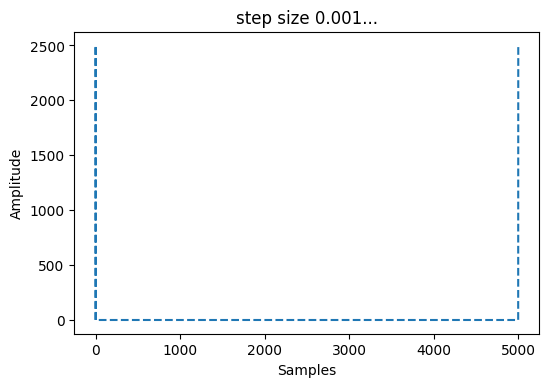

In [96]:
Y = dft(y, print_progress=True)
Y_ampl = np.linalg.norm(Y, axis=1)

plt.figure(dpi=100)
plt.plot(Y_ampl, '--')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('step size ' + str(step_size)[0:5] + '...')

  0%|          | 0/5000 [00:00<?, ?it/s]

Text(0, 0.5, 'Amplitude')

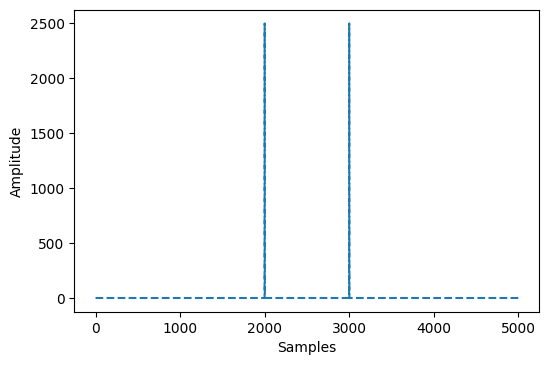

In [129]:
y_2k, _ = get_sin(1, 2000, sampling_rate)

Y_2k = dft(y_2k, print_progress=True)
Y_2k_ampl = np.linalg.norm(Y_2k, axis=1)

plt.figure(dpi=100)
plt.plot(Y_2k_ampl, '--')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

  0%|          | 0/5000 [00:00<?, ?it/s]

Text(0, 0.5, 'Amplitude')

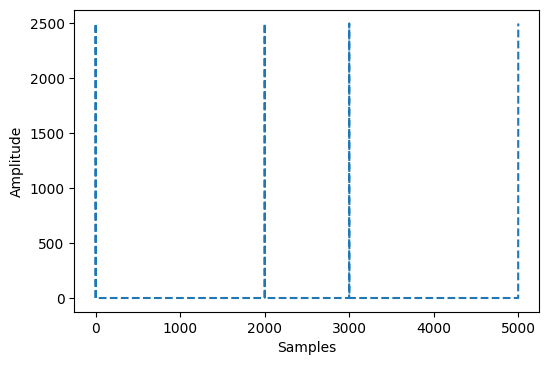

In [130]:
y_combined = y_2k + y

Y_combined = dft(y_combined, print_progress=True)
Y_combined_ampl = np.linalg.norm(Y_combined, axis=1)

plt.figure(dpi=100)
plt.plot(Y_combined_ampl, '--')
plt.xlabel('Samples')
plt.ylabel('Amplitude')